# Config

In [36]:
class Config:
    BATCH_SIZE = 64

# Data loading

In [16]:
from torchvision.datasets import MNIST
from torchvision import transforms

# define transformation layer
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((.5,), (.5,))
])

mnist_dataset = MNIST(root='../data', train=True, download=True, transform=transform)
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

As we can see above, we normalize the image to have mean of ***0.5*** and standard deviation to ***0.5***. 

Why is that?
- Helps the network converge more stably and quickly. This makes it easier for gradient-based optimization algorithms (like those used in neural networks) to converge because the input features are on a smaller, consistent scale and subtracting 0.5 and then dividing by 0.5 yields “an image with mean zero and values in range 1] ... (which) improves convergence of the nets.

In [38]:
from torch.utils.data import DataLoader

data_loader = DataLoader(mnist_dataset, batch_size=Config.BATCH_SIZE, shuffle=True)
data_loader

### Display the image

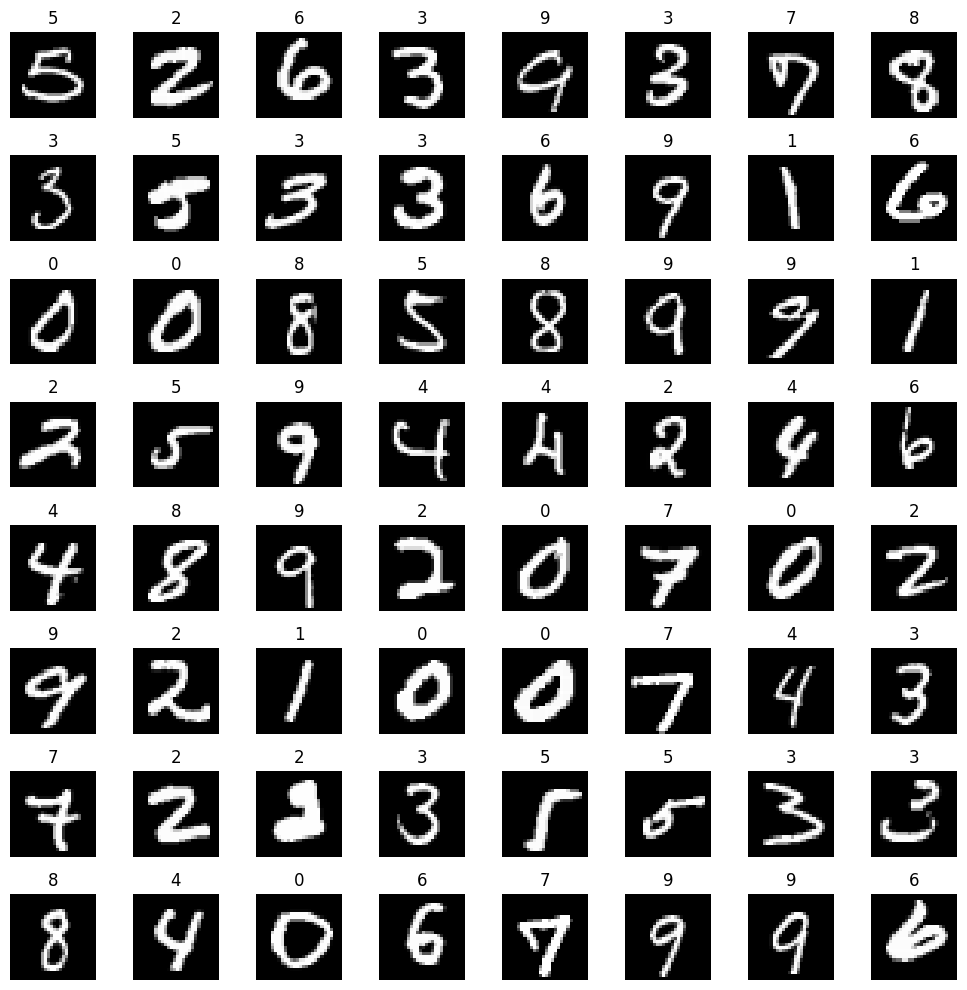

In [71]:
import numpy as np
from matplotlib import pyplot as plt

data_iter = iter(data_loader)
first = next(data_iter)
images, labels = first
N = Config.BATCH_SIZE // 8

fig, axs = plt.subplots(N, N, figsize=(10,10))
for i in range(N):
    for j in range(N):
        idx = i * N + j
        axs[i][j].imshow(np.squeeze(images[idx]), cmap='gray')
        axs[i][j].set_title(labels[idx].numpy())
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()

# Define the network

In [75]:
from torch import nn

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU(True)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU(True)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.tanh(x)
        return x

In [76]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.leaky_relu1 = nn.LeakyReLU(.2, inplace=True)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.leaky_relu2 = nn.LeakyReLU(.2, inplace=True)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.leaky_relu1(x)
        x = self.fc2(x)
        x = self.leaky_relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)